### 1 - Import test data

In [1]:
import pandas as pd
import pandas_ta as ta

df = pd.read_csv("BMW.DEEUR_Candlestick_1_D_BID_03.01.2011-11.05.2024.csv")
df["Gmt time"]=df["Gmt time"].str.replace(".000","")
df['Gmt time']=pd.to_datetime(df['Gmt time'],format='%d.%m.%Y %H:%M:%S')

df=df[df.High!=df.Low]
df.reset_index(inplace=True, drop=True)

In [2]:
# Calculate Bollinger Bands and RSI using pandas_ta
df.ta.bbands(append=True, length=30, std=2)
df.ta.rsi(append=True, length=14)
df["atr"] = ta.atr(low = df.Low, close = df.Close, high = df.High, length=14)

# Rename columns for clarity if necessary
df.rename(columns={
    'BBL_30_2.0': 'bbl', 'BBM_30_2.0': 'bbm', 'BBU_30_2.0': 'bbh', 'RSI_14': 'rsi'
}, inplace=True)

# Calculate Bollinger Bands Width
df['bb_width'] = (df['bbh'] - df['bbl']) / df['bbm']
df

,Gmt time,Open,High,Low,Close,Volume,bbl,bbm,bbh,BBB_30_2.0,BBP_30_2.0,rsi,atr,bb_width
0,2011-01-03,59.200,61.340,59.070,61.330,837.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-01-04,61.459,61.640,60.200,60.720,622.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-05,60.470,60.890,58.210,60.020,689.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-01-06,59.899,60.920,59.660,59.950,845.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-01-07,59.499,60.069,58.530,59.450,856.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,2024-05-06,102.889,103.786,102.572,103.037,2.7823,100.519392,107.421267,114.323141,12.850108,0.182386,40.053551,2.255323,0.128501
3386,2024-05-07,103.524,104.089,102.572,104.089,3.5588,100.472748,107.404467,114.336186,12.907692,0.260848,43.770659,2.202586,0.129077
3387,2024-05-08,101.587,101.587,98.526,100.939,9.0154,100.051658,107.288700,114.525742,13.490781,0.061306,36.477072,2.442615,0.134908
3388,2024-05-09,100.926,101.934,100.072,101.624,3.5732,99.638764,107.144300,114.649836,14.010145,0.132251,38.862839,2.401143,0.140101


In [3]:
df.describe()

,Gmt time,Open,High,Low,Close,Volume,bbl,bbm,bbh,BBB_30_2.0,BBP_30_2.0,rsi,atr,bb_width
count,3390,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3361.000000,3361.000000,3361.000000,3361.000000,3361.000000,3376.000000,3376.000000,3361.000000
mean,2017-09-05 10:48:12.743362816,79.103425,79.987788,78.222577,79.132996,681.414217,73.716202,79.109610,84.503019,14.052821,0.524419,51.412576,1.912018,0.140528
min,2011-01-03 00:00:00,37.707000,39.856000,36.465000,37.723000,2.782300,33.865288,46.165500,54.077283,3.952136,-0.365477,10.324137,1.070859,0.039521
25%,2014-05-02 18:00:00,69.311000,70.263500,68.574000,69.392750,213.250600,64.116241,69.573567,74.589280,9.063486,0.248220,42.550463,1.520969,0.090635
50%,2017-09-02 12:00:00,79.477500,80.345000,78.537000,79.580000,756.000000,74.694824,79.746400,84.832949,12.245794,0.547329,51.474509,1.817772,0.122458
75%,2021-01-17 06:00:00,88.687000,89.404750,87.686750,88.635500,915.750000,83.106925,88.500267,94.122202,16.659960,0.800757,60.349141,2.153351,0.166600
max,2024-05-10 00:00:00,123.050000,123.747000,120.348000,122.749000,4174.984900,111.427914,116.027667,122.435716,72.298148,1.526332,84.979056,4.068434,0.722981
std,NaN,14.555756,14.578041,14.488441,14.538642,546.466671,14.149428,14.117545,14.586157,7.868426,0.337122,12.326542,0.525061,0.078684


In [21]:
def apply_total_signal(df, rsi_threshold_low=30, rsi_threshold_high=70, bb_width_threshold = 0.0015):
    # Initialize the 'TotalSignal' column
    df['TotalSignal'] = 0

    for i in range(1, len(df)):
        # Previous candle conditions
        prev_candle_closes_below_bb = df['Close'].iloc[i-1] < df['bbl'].iloc[i-1]
        prev_rsi_below_thr = df['rsi'].iloc[i-1] < rsi_threshold_low
        # Current candle conditions
        closes_above_prev_high = df['Close'].iloc[i] > df['High'].iloc[i-1]
        bb_width_greater_threshold = df['bb_width'].iloc[i] > bb_width_threshold

        # Combine conditions
        if (prev_candle_closes_below_bb and
            prev_rsi_below_thr and
            closes_above_prev_high and
            bb_width_greater_threshold):
            df.at[i, 'TotalSignal'] = 2  # Set the buy signal for the current candle

        # Previous candle conditions
        prev_candle_closes_above_bb = df['Close'].iloc[i-1] > df['bbh'].iloc[i-1]
        prev_rsi_above_thr = df['rsi'].iloc[i-1] > rsi_threshold_high
        # Current candle conditions
        closes_below_prev_low = df['Close'].iloc[i] < df['Low'].iloc[i-1]
        bb_width_greater_threshold = df['bb_width'].iloc[i] > bb_width_threshold

        # Combine conditions
        if (prev_candle_closes_above_bb and
            prev_rsi_above_thr and
            closes_below_prev_low and
            bb_width_greater_threshold):
            df.at[i, 'TotalSignal'] = 1  # Set the sell signal for the current candle


    return df

apply_total_signal(df=df, rsi_threshold_low=30, rsi_threshold_high=70, bb_width_threshold=0.001)

,Gmt time,Open,High,Low,Close,Volume,bbl,bbm,bbh,BBB_30_2.0,BBP_30_2.0,rsi,atr,bb_width,TotalSignal,pointpos
0,2011-01-03,59.200,61.340,59.070,61.330,837.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2011-01-04,61.459,61.640,60.200,60.720,622.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2011-01-05,60.470,60.890,58.210,60.020,689.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,2011-01-06,59.899,60.920,59.660,59.950,845.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,2011-01-07,59.499,60.069,58.530,59.450,856.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,2024-05-06,102.889,103.786,102.572,103.037,2.7823,100.519392,107.421267,114.323141,12.850108,0.182386,40.053551,2.255323,0.128501,0,NaN
3386,2024-05-07,103.524,104.089,102.572,104.089,3.5588,100.472748,107.404467,114.336186,12.907692,0.260848,43.770659,2.202586,0.129077,0,NaN
3387,2024-05-08,101.587,101.587,98.526,100.939,9.0154,100.051658,107.288700,114.525742,13.490781,0.061306,36.477072,2.442615,0.134908,0,NaN
3388,2024-05-09,100.926,101.934,100.072,101.624,3.5732,99.638764,107.144300,114.649836,14.010145,0.132251,38.862839,2.401143,0.140101,0,NaN


In [22]:
len(df[df.TotalSignal != 0])

18

In [6]:
import numpy as np
def pointpos(x):
    if x['TotalSignal']==2:
        return x['Low']-1e-4
    elif x['TotalSignal']==1:
        return x['High']+1e-4
    else:
        return np.nan

df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)

In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
st=0
dfpl = df[st:st+350]#.set_index("Gmt time")
# Create a plot with 2 rows
fig = make_subplots(rows=2, cols=1)

# Add candlestick plot on the first row
fig.add_trace(go.Candlestick(x=dfpl.index,
                             open=dfpl['Open'],
                             high=dfpl['High'],
                             low=dfpl['Low'],
                             close=dfpl['Close']),
              row=1, col=1)

# Add Bollinger Bands, EMA lines on the same subplot
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['bbl'],
                         line=dict(color='green', width=1),
                         name="BBL"),
              row=1, col=1)
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['bbh'],
                         line=dict(color='green', width=1),
                         name="BBU"),
              row=1, col=1)

# Add markers for trade entry points on the same subplot
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                         marker=dict(size=8, color="MediumPurple"),
                         name="entry"),
              row=1, col=1)

# Add markers for trade entry points on the same subplot
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['rsi'], 
                         line=dict(color='green', width=2),
                         name="BBU"),
              row=2, col=1)

fig.update_layout(width=1200, height=800, sliders=[])
fig.show()

In [17]:
from backtesting import Strategy
from backtesting import Backtest

dfopt = df[0:10000]
def SIGNAL():
    return dfopt.TotalSignal

class MyStrat(Strategy):
    mysize = 0.1
    slcoef = 3
    TPcoef = 2
    
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next()
        slatr = self.slcoef*self.data.atr[-1]
        tpatr = self.TPcoef*self.data.atr[-1]
    
        if self.signal1==2 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + tpatr
            self.buy(sl=sl1, tp=tp1, size=self.mysize)

        if self.signal1==1 and len(self.trades)==0:
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - tpatr
            self.sell(sl=sl1, tp=tp1, size=self.mysize)
        
bt = Backtest(dfopt, MyStrat, cash=10000, margin=1/10, commission=0.001) #0.0002
stats, heatmap = bt.optimize(slcoef=[i/10 for i in range(10, 16)],
                    TPcoef=[i/10 for i in range(10, 21)],
                    maximize='Return [%]', max_tries=300,
                        random_state=0,
                        return_heatmap=True)
stats

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_3648\1785803022.py:32: UserWarning:

Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.



Start                                     0.0
End                                    3389.0
Duration                               3389.0
Exposure Time [%]                    5.516224
Equity Final [$]                 16890.532085
Equity Peak [$]                  16890.532085
Return [%]                          68.905321
Buy & Hold Return [%]               65.312245
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -12.603701
Avg. Drawdown [%]                   -3.420639
Max. Drawdown Duration                  589.0
Avg. Drawdown Duration                75.6875
# Trades                                 18.0
Win Rate [%]                        66.666667
Best Trade [%]                      21.510459
Worst Trade [%]                     -6.708996
Avg. Trade [%]                    

In [9]:
stats["_strategy"]

<Strategy MyStrat(slcoef=1.5,TPcoef=2.0)>

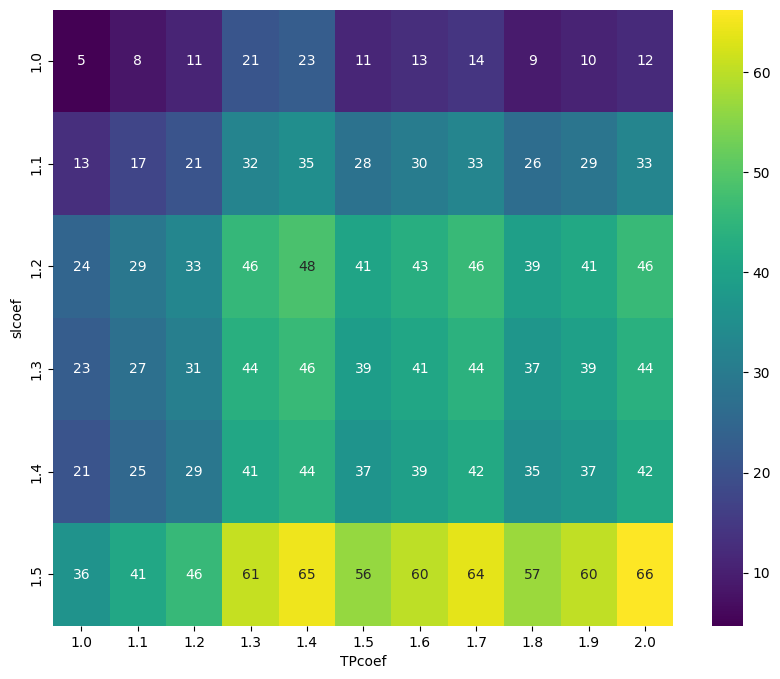

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert multiindex series to dataframe
heatmap_df = heatmap.unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.0f')
plt.show()

In [24]:
bt.plot()

f:\Python\Lib\site-packages\backtesting\_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

f:\Python\Lib\site-packages\backtesting\_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p1307', ...)